## **Extracción, Transformación y Carga de los Datos**

## **Apartado: Integración**

A continuación realizaremos la integración de datos entre el dataset de datos climatologicos y el dataset de datos de fallas y aperturas, cuyo objetivo es el de combinar estos datos para dejarlos en un repositorio unificado y así dejarlos listos para la ralización del el análisis que permitirá tener una vista más completa y coherente de la información en pro de la toma de decisiones informadas. A medida que vamos realizando el proceso de integración, a la vez vamos realizando depuración, limpieza y adecuación de los datos.

Procedemos a cargar los dos datasets para realizar una integración, sin embargo, antes de la integración realizaremos una definición de tipos de variables para no tener inconvenientes al momento de realizar la unión, por otra parte; se realizarán unas pequeñas modificaciones a los nombres de las variables para así poder tratar las mismas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import os

# Cambia el directorio actual al de la carpeta en Google Drive
os.chdir("/content/drive/MyDrive/EAM/Especializacion_Analitica_de_Datos/Proyecto_de_Grado_v2/Datasets/Datasets_Base")

# Lista el contenido de la carpeta
!ls

Mounted at /content/drive
DATASET_ELEMENTOS_TECNOLOGICOS_-_ZONA_-_SALENTO.csv  Precipitacion.csv	Velocidad_Viento.csv
DATASET_FALLAS_-_2021-01-01_2023-06-30.csv	     Temperatura.csv


# *Dataset Fallas*...................
El presente dataset fue construido con datos de las bases de datos de diferentes sistemas de la Empresa de Energía del Quindio, los cuales fueron suministrados directamente por XYZ, información recopilada del sistema OMS (Outage Management System) y del GIS (Geographic Information System), dataset contiene información en Años, Meses, Días, Horas, Minutos y Segudos de las fallas o aperturas que se han presentado en el periodo comprendido desde el 01/01/2021 hasta el 30/06/2023 de las aperturas presentadas en el municipio de **SALENTO** del Departamento del Quindío.

Cargamos el Dataset: "*DATASET_FALLAS_-_2021-01-01_2023-06-30.csv*" el cual contiene la información de las fallas y alimentado con el campo del código del elemento relacionado a la falla (Sin considerar la ZONA (Rural: **R** - URBANO: **U**, así como tampoco con el MUNICIPIO) de las fallas; toda vez que la data viene previamente extraida con filtro al municipio de **SALENTO** de los difentes sistemas anteriormente en mención.

In [2]:
ds_fallas = pd.read_csv('DATASET_FALLAS_-_2021-01-01_2023-06-30.csv')
ds_fallas

,FECHA_INICIO,FECHA_FIN,CODIGO
0,2021/01/01 00:00,2021/01/04 12:48,ARUQ1435
1,2021/01/01 00:00,2021/01/11 11:42,QUUQ0015
2,2021/01/01 00:02,2021/01/01 05:19,205-22
3,2021/01/01 00:02,2021/01/01 05:19,205-22
4,2021/01/01 00:02,2021/01/01 05:19,205-22
...,...,...,...
43442,2023/06/30 20:41,2023/06/30 20:51,R-098
43443,2023/06/30 20:41,2023/06/30 20:52,R-098
43444,2023/06/30 20:47,2023/07/01 12:17,QURQ0380
43445,2023/06/30 20:48,2023/07/02 07:48,CARQ0405


Procedemos a cargar el Dataset: "DATASET_ELEMENTOS_TECNOLOGICOS_-_ZONA_-_SALENTO.csv" el cual contiene la relación Código-Circuito, Código-Reconectador, Código-Aisladero, Código-Cuchilla y Código-Transformador y sus respectivas zonas, registros filtrados previamente sólo para el municipio de Salento:

In [3]:
#----------------------------- JOIN CON TRANSFORMADORES -------------------------
ds_elementos = pd.read_csv('DATASET_ELEMENTOS_TECNOLOGICOS_-_ZONA_-_SALENTO.csv')
ds_elementos

,CODIGO,ZONA
0,307-23-,R
1,307-22-,R
2,307-24-,R
3,307-31,R
4,307-25-,R
...,...,...
535,SARQ0304,R
536,SARN0379,R
537,SARN0382,R
538,SARN0381,R


Usando inner Join (Unión exacta) con los códigos de los fallas relacionados como equipos en las aperturas; se procede a empalmar con el data inicial y así logrando complementar el Dataset con las zonas de los elementos afectados correspondientes:

In [4]:
ds_fallas_elementos = ds_fallas.merge(ds_elementos, on='CODIGO', how='inner')
ds_fallas_elementos = ds_fallas_elementos.drop('CODIGO', axis=1)
ds_fallas_elementos

,FECHA_INICIO,FECHA_FIN,ZONA
0,2021/01/01 10:31,2021/01/01 10:54,U
1,2021/02/05 11:20,2021/02/05 15:10,U
2,2021/02/15 13:39,2021/02/17 12:49,U
3,2021/02/23 08:48,2021/02/23 14:51,U
4,2021/03/28 21:27,2021/03/29 10:50,U
...,...,...,...
1979,2023/06/19 09:47,2023/06/20 13:47,R
1980,2023/06/20 07:50,2023/06/21 10:13,R
1981,2023/06/21 08:30,2023/06/21 10:44,R
1982,2023/06/22 08:28,2023/06/22 15:57,R


Verificamos la estructura de nuestro dataset cargados y empalmado (Falla-Elemento) de Salento:

In [5]:
ds_fallas_elementos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA_INICIO  1984 non-null   object
 1   FECHA_FIN     1984 non-null   object
 2   ZONA          1984 non-null   object
dtypes: object(3)
memory usage: 62.0+ KB


Procedemos a asignar los tipos de datos correspondientes según naturaleza de la caracteristica, toda vez que según comprobación anterior evidenciamos que todos los campos fueron tipificados de tipo "object", acto seguido; observamos nuevamente la información de la estructura del dataframe de fallas según ajustes de tipos de datos realizados sobre las caracteristicas::

In [6]:
ds_fallas_elementos['FECHA_INICIO'] = pd.to_datetime(ds_fallas_elementos['FECHA_INICIO']) # Convertir la columna 'FECHA_INICIO' en objetos datetime
ds_fallas_elementos['FECHA_FIN'] = pd.to_datetime(ds_fallas_elementos['FECHA_FIN']) # Convertir la columna 'FECHA_INICIO' en objetos datetime
ds_fallas_elementos["ZONA"]=ds_fallas_elementos["ZONA"].astype("category")
ds_fallas_elementos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA_INICIO  1984 non-null   datetime64[ns]
 1   FECHA_FIN     1984 non-null   datetime64[ns]
 2   ZONA          1984 non-null   category      
dtypes: category(1), datetime64[ns](2)
memory usage: 48.6 KB


Relizamos comprobación general de nuestro Dataset:

In [7]:
ds_fallas_elementos

,FECHA_INICIO,FECHA_FIN,ZONA
0,2021-01-01 10:31:00,2021-01-01 10:54:00,U
1,2021-02-05 11:20:00,2021-02-05 15:10:00,U
2,2021-02-15 13:39:00,2021-02-17 12:49:00,U
3,2021-02-23 08:48:00,2021-02-23 14:51:00,U
4,2021-03-28 21:27:00,2021-03-29 10:50:00,U
...,...,...,...
1979,2023-06-19 09:47:00,2023-06-20 13:47:00,R
1980,2023-06-20 07:50:00,2023-06-21 10:13:00,R
1981,2023-06-21 08:30:00,2023-06-21 10:44:00,R
1982,2023-06-22 08:28:00,2023-06-22 15:57:00,R


- ### **Descripción de los Campos del Dataset de Fallas:**

- **FECHA_INICIO:** Identificación del momento exacto en el cual se presenta la apertura (falla) de la red en un punto geografico determinado del municipio de Salento. Está es una variable de tipo datetime con formato: [DÍA/MES/AÑO HORA:MINUTO:SEGUNDO]

- **FECHA_FIN:** Identificación del momento exacto en el cual se restablece (normaliza ó soluciona) la apertura presentada en un punto geografico determinado del municipio de Salento. Está es una variable de tipo datetime con formato: [DÍA/MES/AÑO HORA:MINUTO:SEGUNDO]

- **DURACION:** Identificación del tiempo transcurrido entre la FECHA_INICIO y FECHA_FIN de la apertura presentada. Esta variable se mide en Días, Horas, Minutos, Segundo y Milisegundos. Está es una variable de tipo timedelta con formato: [DÍAS HORA:MINUTO:SEGUNDO]

- **ZONA:** Identificación del tipo de área en donde se encuentra úbicado el elemento técnologico en relación a la apertura presentada, esta puede ser de tipo:
  - U -> Urbana.
  - R -> Rural.
  
  Está es una variable de tipo category.

Procedemos a crear la nueva columna "DURACION_FALLA" con el objetivo de proximamente tomarla como referencia para la categorización de la variable objetivo de la clarificación, acto seguido procedemos a eliminar la variable: "FECHA_FIN" toda vez que ya no se hace relevante para nuestro caso de estudio:

In [8]:
ds_fallas_elementos['DURACION_FALLA'] = (ds_fallas_elementos['FECHA_FIN'] - ds_fallas_elementos['FECHA_INICIO'])
ds_fallas_elementos = ds_fallas_elementos.drop('FECHA_FIN', axis=1) # Se elimina la columna "FECHA_FIN" toda vez que ya no se hace necesaria posterior al calculo y creación del campo: "DURACION_FALLA".
ds_fallas_elementos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   FECHA_INICIO    1984 non-null   datetime64[ns] 
 1   ZONA            1984 non-null   category       
 2   DURACION_FALLA  1984 non-null   timedelta64[ns]
dtypes: category(1), datetime64[ns](1), timedelta64[ns](1)
memory usage: 48.6 KB


Relizamos una vez más comprobación de nuestro dataset para validar que el nuevo campo se haya creado satisfactoriamente:

In [9]:
ds_fallas_elementos

,FECHA_INICIO,ZONA,DURACION_FALLA
0,2021-01-01 10:31:00,U,0 days 00:23:00
1,2021-02-05 11:20:00,U,0 days 03:50:00
2,2021-02-15 13:39:00,U,1 days 23:10:00
3,2021-02-23 08:48:00,U,0 days 06:03:00
4,2021-03-28 21:27:00,U,0 days 13:23:00
...,...,...,...
1979,2023-06-19 09:47:00,R,1 days 04:00:00
1980,2023-06-20 07:50:00,R,1 days 02:23:00
1981,2023-06-21 08:30:00,R,0 days 02:14:00
1982,2023-06-22 08:28:00,R,0 days 07:29:00


Como en nuestro caso de estudio se trabajará con información por **hora** (tanto del clima como de las fallas) se realiza ajuste sobre el campo "FECHA_INICIO" se suprime el valor de los minutos y segundos, de manera que sólo se considere el año, mes, día y hora y así poder realizar match entre los dataset (Fallas y Clima) por hora:

In [10]:
ds_fallas_elementos['FECHA_INICIO'] = ds_fallas_elementos['FECHA_INICIO'].dt.floor('H') # Establecer los minutos y segundos en 00:00:00
ds_fallas_elementos.info() # Verificar la información del DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   FECHA_INICIO    1984 non-null   datetime64[ns] 
 1   ZONA            1984 non-null   category       
 2   DURACION_FALLA  1984 non-null   timedelta64[ns]
dtypes: category(1), datetime64[ns](1), timedelta64[ns](1)
memory usage: 48.6 KB


Realizamos comprobación general de nuestro dataset para validar que el último cambio aplicado haya tenido efecto:

In [11]:
ds_fallas_elementos

,FECHA_INICIO,ZONA,DURACION_FALLA
0,2021-01-01 10:00:00,U,0 days 00:23:00
1,2021-02-05 11:00:00,U,0 days 03:50:00
2,2021-02-15 13:00:00,U,1 days 23:10:00
3,2021-02-23 08:00:00,U,0 days 06:03:00
4,2021-03-28 21:00:00,U,0 days 13:23:00
...,...,...,...
1979,2023-06-19 09:00:00,R,1 days 04:00:00
1980,2023-06-20 07:00:00,R,1 days 02:23:00
1981,2023-06-21 08:00:00,R,0 days 02:14:00
1982,2023-06-22 08:00:00,R,0 days 07:29:00


Valudamos que nuestro dataset de Fallas siga conservando el mismo espacio en tiempo deseado: Desde el 2022-01-01 hasta el 2023-06-30:

In [12]:
print('FECHA_INICIO MIN ->',ds_fallas_elementos['FECHA_INICIO'].min())
print('FECHA_INICIO MAX ->',ds_fallas_elementos['FECHA_INICIO'].max())

FECHA_INICIO MIN -> 2021-01-01 10:00:00
FECHA_INICIO MAX -> 2023-06-30 16:00:00


Se realiza validación de registros nulos en el dataset de fallas; validación en la cual se logra evidenciar ausencia de estos en la nueva versión del dataset:

In [13]:
ds_fallas_elementos.isnull().sum()

FECHA_INICIO      0
ZONA              0
DURACION_FALLA    0
dtype: int64

Realizamos validación de registros duplicados por caracteristica en el dataset de fallas:

In [14]:
print(ds_fallas_elementos['FECHA_INICIO'].unique())
print(ds_fallas_elementos['DURACION_FALLA'].unique())
print(ds_fallas_elementos['ZONA'].unique())

['2021-01-01T10:00:00.000000000' '2021-02-05T11:00:00.000000000'
 '2021-02-15T13:00:00.000000000' ... '2023-06-19T09:00:00.000000000'
 '2023-06-22T08:00:00.000000000' '2023-06-26T07:00:00.000000000']
[  1380000000000  13800000000000 169800000000000 ... 100800000000000
  94980000000000  26940000000000]
['U', 'R']
Categories (2, object): ['R', 'U']


Se observa que:

- La fecha de inicio va desde: 2021-01-01T10:00:00.000000000 hasta: 2023-06-26T07:00:00.000000000.

- La duración de las fallas en su respectivo formato Deltatime.

- Las zonas donde se presentan las fallas: U (Urbano) y R (Rural).

Realizamos una vez más comprobación de nuestro Dataset.

In [15]:
ds_fallas_elementos

,FECHA_INICIO,ZONA,DURACION_FALLA
0,2021-01-01 10:00:00,U,0 days 00:23:00
1,2021-02-05 11:00:00,U,0 days 03:50:00
2,2021-02-15 13:00:00,U,1 days 23:10:00
3,2021-02-23 08:00:00,U,0 days 06:03:00
4,2021-03-28 21:00:00,U,0 days 13:23:00
...,...,...,...
1979,2023-06-19 09:00:00,R,1 days 04:00:00
1980,2023-06-20 07:00:00,R,1 days 02:23:00
1981,2023-06-21 08:00:00,R,0 days 02:14:00
1982,2023-06-22 08:00:00,R,0 days 07:29:00


Se procede a reajustar nombre de los campos así:

- Campo "FECHA_INICIO" por "Fecha".
- Campo "ZONA" por "Zona"
- Campo "DURACION_FALLA" por "Duracion_Falla".


In [16]:
ds_fallas_elementos.rename(columns={'FECHA_INICIO':'Fecha'}, inplace=True)
ds_fallas_elementos.rename(columns={'ZONA':'Zona'}, inplace=True)
ds_fallas_elementos.rename(columns={'DURACION_FALLA':'Duracion_Falla'}, inplace=True)
ds_fallas_elementos.head()

,Fecha,Zona,Duracion_Falla
0,2021-01-01 10:00:00,U,0 days 00:23:00
1,2021-02-05 11:00:00,U,0 days 03:50:00
2,2021-02-15 13:00:00,U,1 days 23:10:00
3,2021-02-23 08:00:00,U,0 days 06:03:00
4,2021-03-28 21:00:00,U,0 days 13:23:00


# *Dataset Clima*...................

El presente dataset fue descargado del banco de datos abierto del gobierno nacional de Colombia encontrado en la siguiente página: https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Temperatura/xq6k-pr9h, los cuales fueron suministranods directamente por el IDEAM.

Contiene información de las temperaturas en grados centigrados registradas en los municipios de 'PIJAO' 'MONTENEGRO' 'CALARCÁ' 'ARMENIA' 'SALENTO' 'BUENAVISTA' del Departamento del Quindío, a continuación se describen cada una de las variables encontradas:

CodigoEstacion: Identificación metereológica donde se registraron los datos; variable de tipo int.
CodigoSensor: Identificación del sensor que registró los datos; variable de tipo int.
FechaObservacion: Fecha en la que se registró la temperatura expresada en mes, día, año hora, minutos y segundos, en el rango del 01 de junio del 2021 al 30 de junio del 2023; variable de tipo date.
ValorObservado: Valor de la temperatura registrada cada 10 minutos durante el día representado en grados centigrados; variable de tipo float.
NombreEstacion: Nombre de la estación metereológica; variable de tipo string.
Departamento: Departamento donde se registró la temperatura; variable de tipo string.
Municipio: Municipio donde se regustro el dato; variable de tipo string.
ZonaHidrografica: Zona hidrográfica a la cual pertenece el departamento registrado; variable de tipo string.
Latitud y Longitud: Ubicación geografica donde se registro el dato; variable de tipo float.
DescripcionSensor: Descripción del sensor que registró el dato; variable de tipo string.
UnidadMedida: Unidad de medida en la que se registra la temperatura, para el caso en grados centigrados; variable de tipo float.

# *-------------------------------- (ETL) TEMPERATURA --------------------------------------*

En el siguiente apartado realizamos la Extracción, Transformación y Carga del dataset de la variable climatologica: TEMPERATURA.

Relizamos la carga del archivo: "Temperatura.csv":

In [17]:
df_temperatura = pd.read_csv('Temperatura.csv')
df_temperatura

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,26125509,68,08/25/2022 10:10:00 AM,22.49668,ESPERANZA LA - AUT,QUINDÍO,PIJAO,CAUCA,4.299444,-75.725081,Temp Aire 2 m,°C
1,26125506,68,08/25/2022 01:25:00 AM,17.95608,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C
2,26125509,68,08/25/2022 04:30:00 AM,13.81464,ESPERANZA LA - AUT,QUINDÍO,PIJAO,CAUCA,4.299444,-75.725081,Temp Aire 2 m,°C
3,26125509,68,08/25/2022 04:00:00 PM,22.40719,ESPERANZA LA - AUT,QUINDÍO,PIJAO,CAUCA,4.299444,-75.725081,Temp Aire 2 m,°C
4,26125506,68,08/25/2022 03:00:00 AM,17.64237,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
774854,26125506,68,06/30/2023 12:20:00 AM,19.70496,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C
774855,26125506,68,06/30/2023 04:35:00 PM,30.25944,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C
774856,26125506,68,06/30/2023 08:05:00 PM,22.45476,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C
774857,26125506,68,06/30/2023 03:30:00 AM,18.39402,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Temp Aire 2 m,°C


Observamos la estructura de nuestro dataset de temperatura cargado:

In [18]:
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774859 entries, 0 to 774858
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CodigoEstacion     774859 non-null  int64  
 1   CodigoSensor       774859 non-null  int64  
 2   FechaObservacion   774859 non-null  object 
 3   ValorObservado     774859 non-null  float64
 4   NombreEstacion     774859 non-null  object 
 5   Departamento       774859 non-null  object 
 6   Municipio          774859 non-null  object 
 7   ZonaHidrografica   774859 non-null  object 
 8   Latitud            774859 non-null  float64
 9   Longitud           774859 non-null  float64
 10  DescripcionSensor  774859 non-null  object 
 11  UnidadMedida       774859 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 70.9+ MB


### **Eliminación de variables Irrelevantes:**
Se deciden borrar las siguientes variables por no aportar información relevante al caso de estudio:

- **CodigoEstacion**
- **CodigoSensor**
- **NombreEstacion**
- **Departamento**
- **ZonaHidrografica**
- **Latitud**
- **Longitud**
- **DescripcionSensor**
- **UnidadMedida**

In [19]:
df_temperatura.drop('CodigoEstacion', axis=1, inplace=True)
df_temperatura.drop('CodigoSensor', axis=1, inplace=True)
df_temperatura.drop('NombreEstacion', axis=1, inplace=True)
df_temperatura.drop('Departamento', axis=1, inplace=True)
df_temperatura.drop('ZonaHidrografica', axis=1, inplace=True)
df_temperatura.drop('Latitud', axis=1, inplace=True )
df_temperatura.drop('Longitud', axis=1, inplace=True)
df_temperatura.drop('DescripcionSensor', axis=1, inplace=True)
df_temperatura.drop('UnidadMedida', axis=1, inplace=True)

df_temperatura.head()

,FechaObservacion,ValorObservado,Municipio
0,08/25/2022 10:10:00 AM,22.49668,PIJAO
1,08/25/2022 01:25:00 AM,17.95608,MONTENEGRO
2,08/25/2022 04:30:00 AM,13.81464,PIJAO
3,08/25/2022 04:00:00 PM,22.40719,PIJAO
4,08/25/2022 03:00:00 AM,17.64237,MONTENEGRO


Como nuestro objetivo es trabajar solamente con el municipio de **SALENTO** se procede a eliminar los registros de temperatura relacionados a los municipios de 'ARMENIA', 'BUENAVISTA', 'CALARCÁ', 'MONTENEGRO' y 'PIJAO':

In [20]:
# Eliminar las filas donde el municipio es 'ARMENIA', 'BUENAVISTA', 'CALARCÁ', 'MONTENEGRO' y 'PIJAO', ya que nuestro objetivo es trabajar solamente con datos de SALENTO:
df_temperatura = df_temperatura.drop(df_temperatura[df_temperatura['Municipio'] == 'ARMENIA'].index)
df_temperatura = df_temperatura.drop(df_temperatura[df_temperatura['Municipio'] == 'BUENAVISTA'].index)
df_temperatura = df_temperatura.drop(df_temperatura[df_temperatura['Municipio'] == 'CALARCÁ'].index)
df_temperatura = df_temperatura.drop(df_temperatura[df_temperatura['Municipio'] == 'MONTENEGRO'].index)
df_temperatura = df_temperatura.drop(df_temperatura[df_temperatura['Municipio'] == 'PIJAO'].index)

df_temperatura

,FechaObservacion,ValorObservado,Municipio
127,08/25/2022 05:00:00 AM,12.3,SALENTO
41594,02/23/2021 09:00:00 PM,16.0,SALENTO
41613,02/23/2021 06:00:00 PM,20.3,SALENTO
41652,02/23/2021 10:00:00 PM,15.1,SALENTO
41711,02/23/2021 01:00:00 PM,21.6,SALENTO
...,...,...,...
673037,03/17/2023 12:00:00 AM,15.0,SALENTO
673282,03/17/2023 03:00:00 AM,14.7,SALENTO
673820,03/17/2023 04:00:00 AM,14.5,SALENTO
673825,03/17/2023 01:00:00 AM,15.0,SALENTO


Comprobamos que efectivamente nuestro único municipio de estudio dentro del dataset es: "SALENTO":

In [21]:
print(df_temperatura['Municipio'].unique()) # Varificamos valores únicos de los municipios

['SALENTO']


Hecho lo anterior; procedemos a eliminar el campo "Municipio" por ser irrelevante para nuestros modelos venideros:

In [22]:
df_temperatura.drop('Municipio', axis=1, inplace=True)

Asignamos tipo de dato: "datetime64" a nuestro campo: "FechaObservacion"
NOTA: Al campo: "ValorObservado" no hay necesidad de hacerle cambio alguno toda vez que se observa que el tipo de datos le fue correctameten asignado -> "float64":

In [23]:
df_temperatura['FechaObservacion'] = pd.to_datetime(df_temperatura['FechaObservacion']) #Tipificamos tipo de dato fecha

df_temperatura.info() # Validamos los cambios aplicados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836 entries, 127 to 673884
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FechaObservacion  13836 non-null  datetime64[ns]
 1   ValorObservado    13836 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.3 KB


Ordenamos dataset de temperatura por fecha:

In [24]:
df_temperatura = df_temperatura.sort_values(by = 'FechaObservacion', ascending=True)
df_temperatura

,FechaObservacion,ValorObservado
41737,2021-02-23 11:00:00,20.6
41711,2021-02-23 13:00:00,21.6
42052,2021-02-23 14:00:00,21.2
42025,2021-02-23 15:00:00,22.7
42040,2021-02-23 16:00:00,23.2
...,...,...
673037,2023-03-17 00:00:00,15.0
673825,2023-03-17 01:00:00,15.0
673884,2023-03-17 02:00:00,14.9
673282,2023-03-17 03:00:00,14.7


Comprobamos valores nulos dentro de nuestro dataset Temperatura:

In [25]:
#Identificamos valores nulos
df_temperatura.isnull().sum()

FechaObservacion    0
ValorObservado      0
dtype: int64

Comprobamos valores unicos de nuestro campo: "FechaObservacion" dentro de nuestro dataset Temperatura:

In [26]:
print(df_temperatura['FechaObservacion'].unique())

['2021-02-23T11:00:00.000000000' '2021-02-23T13:00:00.000000000'
 '2021-02-23T14:00:00.000000000' ... '2023-03-17T02:00:00.000000000'
 '2023-03-17T03:00:00.000000000' '2023-03-17T04:00:00.000000000']


Comprobamos registros duplicados dentro de nuestro dataset Temperatura:

In [27]:
#Validamos si hay filas duplicadas
df_temperatura[df_temperatura.duplicated()]

,FechaObservacion,ValorObservado


Verificamos una vez más la estructura de nuestro dataset:

In [28]:
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836 entries, 41737 to 673820
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FechaObservacion  13836 non-null  datetime64[ns]
 1   ValorObservado    13836 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.3 KB


Teniendo en cuenta que los valores de la temperatura estan registrados cada 10 minutos durante el día, se opta por realizar un promedio por cada hora en cada uno de los municipios:

Para lo cual; en primera instancia se llevan las fechas de observaciones a la hora piso:

In [29]:
df_temperatura['FechaObservacion'] = df_temperatura['FechaObservacion'].dt.floor('H') # Establecer los minutos y segundos en 00:00:00
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836 entries, 41737 to 673820
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FechaObservacion  13836 non-null  datetime64[ns]
 1   ValorObservado    13836 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.3 KB


Acto seguido, se procede a calcular el valor promediado por hora de los valores observados y se renombra el campo: "FechaObservacion" por "Fecha", y el campo: "ValorObservado" por: "Temperatura_Promedio":

In [30]:
# Agrupamos los datos por 'FechaObservacion' y se calcula el acumulado por hora de 'ValorObservado'
df_temperatura = df_temperatura.groupby(['FechaObservacion'])['ValorObservado'].mean().reset_index()

# Renombramos las columnas para mayor claridad
df_temperatura.columns = ['Fecha','Temperatura_Promedio']

Reordenamos una vez más nuestro dataset de temperatura:

In [31]:
#Ordenamos nuevamente el dataset por fecha ascendente
df_temperatura = df_temperatura.sort_values(by = 'Fecha', ascending=True)

Comprobamos ordenamiento por fecha anteriormente realizado:

In [32]:
df_temperatura

,Fecha,Temperatura_Promedio
0,2021-02-23 11:00:00,20.6
1,2021-02-23 13:00:00,21.6
2,2021-02-23 14:00:00,21.2
3,2021-02-23 15:00:00,22.7
4,2021-02-23 16:00:00,23.2
...,...,...
13831,2023-03-17 00:00:00,15.0
13832,2023-03-17 01:00:00,15.0
13833,2023-03-17 02:00:00,14.9
13834,2023-03-17 03:00:00,14.7


Comprobamos que los registros del dataset de temperatura de encuentren dentro del periodo de estudio (Desde 2022-01-01 hasta el 2023-06-30):

In [33]:
print('Fecha MIN ->',df_temperatura['Fecha'].min())
print('Fecha MAX ->',df_temperatura['Fecha'].max())

print('Valor MIN ->',df_temperatura['Temperatura_Promedio'].min())
print('Valor MAX ->',df_temperatura['Temperatura_Promedio'].max())

Fecha MIN -> 2021-02-23 11:00:00
Fecha MAX -> 2023-03-17 04:00:00
Valor MIN -> 10.3
Valor MAX -> 27.8


Observamos la estructura de nuestro dataset de Temperatura:

In [34]:
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836 entries, 0 to 13835
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 13836 non-null  datetime64[ns]
 1   Temperatura_Promedio  13836 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.3 KB


Procedemos a diagramar el comportamiento de la variable Temperatura del municipio de Salento durante el tiempo correspondiente:

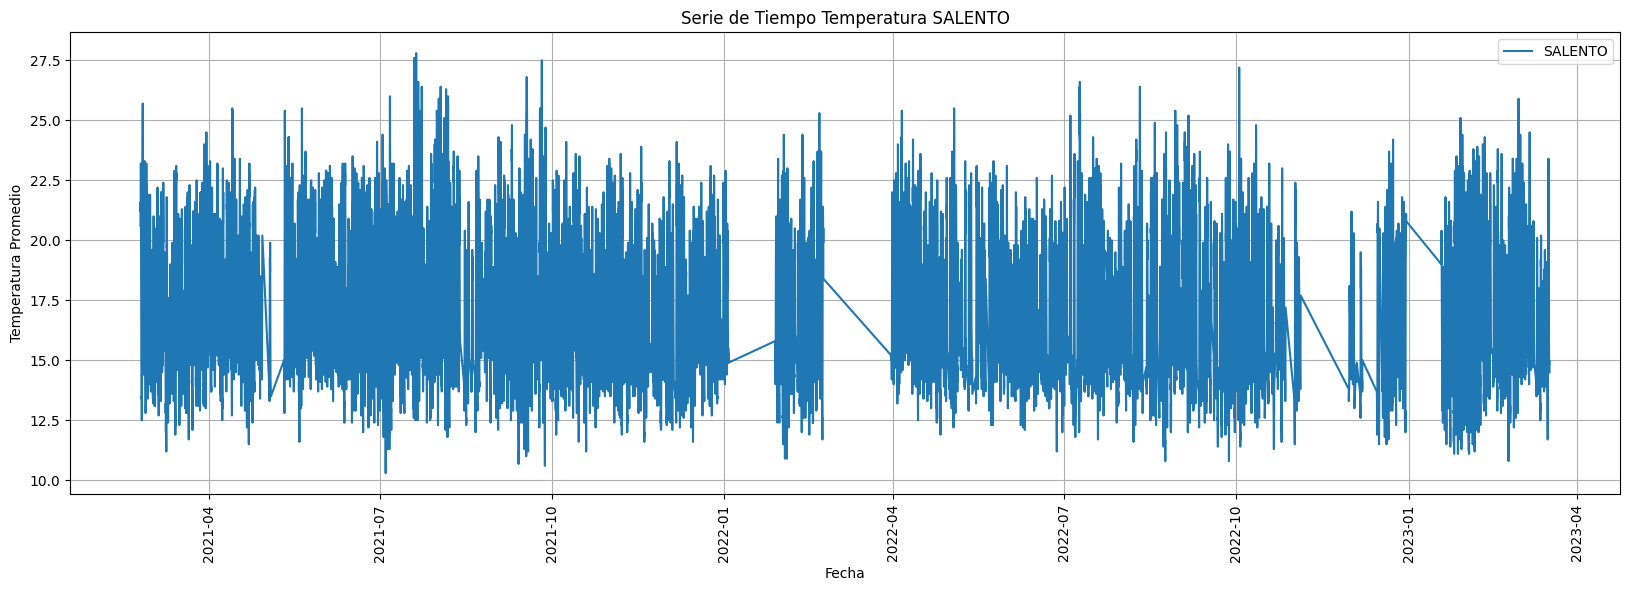

In [35]:
plt.figure(figsize=(20, 6))
plt.plot(df_temperatura['Fecha'], df_temperatura['Temperatura_Promedio'], label='SALENTO')
plt.title(f'Serie de Tiempo Temperatura SALENTO')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

**JOIN -> FALLAS - TEMPERATURA**

Se procede a realizar la union entre los dataset: "ds_fallas_elementos": Fallas y "df_temperatura": Clima mediante un join de tipo inner con el objetivo con el obejtivo de hacer matchs exactos de los registros según fecha (por hora):

In [36]:
ds_fallas_temperatura = ds_fallas_elementos.merge(df_temperatura, on='Fecha', how='inner')

Comprobamos la estructura de nuestro nuevo dataset conformado entre las fallas y la variable Temperatura Promedio:

In [37]:
ds_fallas_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Fecha                 1165 non-null   datetime64[ns] 
 1   Zona                  1165 non-null   category       
 2   Duracion_Falla        1165 non-null   timedelta64[ns]
 3   Temperatura_Promedio  1165 non-null   float64        
dtypes: category(1), datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 37.7 KB


In [38]:
ds_fallas_temperatura.head()

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio
0,2021-03-28 21:00:00,U,0 days 13:23:00,15.2
1,2022-02-04 08:00:00,U,0 days 02:21:00,16.2
2,2022-03-31 21:00:00,U,0 days 14:54:00,15.3
3,2022-07-17 09:00:00,U,1 days 00:46:00,17.0
4,2022-08-05 14:00:00,U,0 days 02:36:00,20.3


Procedemos a validar registros duplicados del dataset previamente conformado evidenciando que efectivamente se cuentan con 171 registros duplicados:

In [39]:
ds_fallas_temperatura[ds_fallas_temperatura.duplicated()] #Validamos si hay filas duplicadas

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio
12,2021-04-09 12:00:00,R,11 days 18:41:00,18.8
14,2021-04-09 12:00:00,R,12 days 19:03:00,18.8
16,2021-04-09 12:00:00,R,10 days 18:34:00,18.8
18,2021-04-09 12:00:00,R,8 days 21:34:00,18.8
20,2021-04-09 12:00:00,R,5 days 18:33:00,18.8
...,...,...,...,...
1144,2022-12-24 08:00:00,R,10 days 06:55:00,17.2
1145,2022-12-24 08:00:00,R,10 days 06:55:00,17.2
1146,2022-12-24 08:00:00,R,10 days 06:55:00,17.2
1149,2022-09-13 14:00:00,R,0 days 21:16:00,19.5


Se procede a eliminar los registros duplicados con el objetivo de que no interfieran en el caso de estudio por redundancia:

In [40]:
ds_fallas_temperatura = ds_fallas_temperatura.drop_duplicates() # Eliminamos los registros duplicados y actualizamos el DataFrame

Compramos nuevamente registros duplicados, evidenciando que efectivamente ya no se tienen los mismos:

In [41]:
ds_fallas_temperatura[ds_fallas_temperatura.duplicated()] #Validamos si hay filas duplicadas

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio


Verificamos una vez más la estructura de nuestro Dataset Fallas-Temperatura:

In [42]:
ds_fallas_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1164
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Fecha                 994 non-null    datetime64[ns] 
 1   Zona                  994 non-null    category       
 2   Duracion_Falla        994 non-null    timedelta64[ns]
 3   Temperatura_Promedio  994 non-null    float64        
dtypes: category(1), datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 32.2 KB


Comprobamos una vez más nuestro dataset Fallas-Temperatura:

In [43]:
ds_fallas_temperatura

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio
0,2021-03-28 21:00:00,U,0 days 13:23:00,15.2
1,2022-02-04 08:00:00,U,0 days 02:21:00,16.2
2,2022-03-31 21:00:00,U,0 days 14:54:00,15.3
3,2022-07-17 09:00:00,U,1 days 00:46:00,17.0
4,2022-08-05 14:00:00,U,0 days 02:36:00,20.3
...,...,...,...,...
1159,2023-02-11 14:00:00,R,0 days 03:03:00,22.8
1160,2023-02-13 09:00:00,R,0 days 02:07:00,20.4
1161,2023-02-15 17:00:00,U,0 days 20:04:00,17.0
1162,2023-02-24 17:00:00,R,0 days 16:32:00,18.0


# *-------------------------------- (ETL) PRECIPITACIONES --------------------------------------*

En el siguiente apartado realizamos la Extracción, Transformación y Carga del dataset de la variable climatologica: PRECIPITACIONES.

Relizamos la carga del archivo: "Tem
":

In [44]:
df_precipitaciones = pd.read_csv('Precipitacion.csv')
df_precipitaciones

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,26125505,240,04/21/2023 03:50:00 PM,0.000,LA BELLA - AUT,QUINDÍO,CALARCÁ,CAUCA,4.501111,-75.671389,Precipitacion,mm
1,26125061,240,04/21/2023 11:50:00 AM,0.039,APTO EL EDEN,QUINDÍO,ARMENIA,CAUCA,4.455000,-75.766000,Precipitacion,mm
2,26125061,240,04/21/2023 09:00:00 PM,0.076,APTO EL EDEN,QUINDÍO,ARMENIA,CAUCA,4.455000,-75.766000,Precipitacion,mm
3,26125509,240,01/01/2021 11:05:00 AM,0.000,ESPERANZA LA - AUT,QUINDÍO,PIJAO,CAUCA,4.299444,-75.725081,Precipitacion,mm
4,26125504,240,01/01/2021 12:10:00 PM,0.000,PARAGUAICITO - AUT,QUINDÍO,BUENAVISTA,CAUCA,4.395556,-75.734167,Precipitacion,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
1006348,26125506,240,06/30/2023 01:45:00 PM,0.000,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Precipitacion,mm
1006349,26125061,240,06/30/2023 02:00:00 AM,0.000,APTO EL EDEN,QUINDÍO,ARMENIA,CAUCA,4.455000,-75.766000,Precipitacion,mm
1006350,26125504,240,06/30/2023 08:45:00 AM,0.000,PARAGUAICITO - AUT,QUINDÍO,BUENAVISTA,CAUCA,4.395556,-75.734167,Precipitacion,mm
1006351,26125506,240,06/30/2023 11:00:00 PM,0.000,EL AGRADO - AUT,QUINDÍO,MONTENEGRO,CAUCA,4.518333,-75.792500,Precipitacion,mm


Observamos la estructura de nuestro dataset de Precipitaciones cargado:

In [45]:
df_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006353 entries, 0 to 1006352
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CodigoEstacion     1006353 non-null  int64  
 1   CodigoSensor       1006353 non-null  int64  
 2   FechaObservacion   1006353 non-null  object 
 3   ValorObservado     1006353 non-null  float64
 4   NombreEstacion     1006353 non-null  object 
 5   Departamento       1006353 non-null  object 
 6   Municipio          1006353 non-null  object 
 7   ZonaHidrografica   1006353 non-null  object 
 8   Latitud            1006353 non-null  float64
 9   Longitud           1006353 non-null  float64
 10  DescripcionSensor  1006353 non-null  object 
 11  UnidadMedida       1006353 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 92.1+ MB


### **Eliminación de variables Irrelevantes:**
Se deciden borrar las siguientes variables por no aportar información relevante al caso de estudio:

- **CodigoEstacion**
- **CodigoSensor**
- **NombreEstacion**
- **Departamento**
- **ZonaHidrografica**
- **Latitud**
- **Longitud**
- **DescripcionSensor**
- **UnidadMedida**

In [46]:
df_precipitaciones.drop('CodigoEstacion', axis=1, inplace=True)
df_precipitaciones.drop('CodigoSensor', axis=1, inplace=True)
df_precipitaciones.drop('NombreEstacion', axis=1, inplace=True)
df_precipitaciones.drop('Departamento', axis=1, inplace=True)
df_precipitaciones.drop('ZonaHidrografica', axis=1, inplace=True)
df_precipitaciones.drop('Latitud', axis=1, inplace=True )
df_precipitaciones.drop('Longitud', axis=1, inplace=True)
df_precipitaciones.drop('DescripcionSensor', axis=1, inplace=True)
df_precipitaciones.drop('UnidadMedida', axis=1, inplace=True)

df_precipitaciones.head()

,FechaObservacion,ValorObservado,Municipio
0,04/21/2023 03:50:00 PM,0.000,CALARCÁ
1,04/21/2023 11:50:00 AM,0.039,ARMENIA
2,04/21/2023 09:00:00 PM,0.076,ARMENIA
3,01/01/2021 11:05:00 AM,0.000,PIJAO
4,01/01/2021 12:10:00 PM,0.000,BUENAVISTA


Como nuestro objetivo es trabajar solamente con el municipio de SALENTO se procede a eliminar los registros de precipitaciones relacionados a los municipios de 'ARMENIA', 'BUENAVISTA', 'CALARCÁ', 'MONTENEGRO' y 'PIJAO':

In [47]:
# Eliminar las filas donde el municipio es 'ARMENIA', 'BUENAVISTA', 'CALARCÁ', 'MONTENEGRO' y 'PIJAO', ya que nuestro objetivo es trabajar solamente con datos de SALENTO:
df_precipitaciones = df_precipitaciones.drop(df_precipitaciones[df_precipitaciones['Municipio'] == 'ARMENIA'].index)
df_precipitaciones = df_precipitaciones.drop(df_precipitaciones[df_precipitaciones['Municipio'] == 'BUENAVISTA'].index)
df_precipitaciones = df_precipitaciones.drop(df_precipitaciones[df_precipitaciones['Municipio'] == 'CALARCÁ'].index)
df_precipitaciones = df_precipitaciones.drop(df_precipitaciones[df_precipitaciones['Municipio'] == 'MONTENEGRO'].index)
df_precipitaciones = df_precipitaciones.drop(df_precipitaciones[df_precipitaciones['Municipio'] == 'PIJAO'].index)

df_precipitaciones

,FechaObservacion,ValorObservado,Municipio
49810,02/23/2021 04:30:00 PM,0.0,SALENTO
49813,02/23/2021 06:50:00 PM,0.0,SALENTO
49833,02/23/2021 04:10:00 PM,0.0,SALENTO
49859,02/23/2021 08:00:00 PM,0.0,SALENTO
49862,02/23/2021 04:40:00 PM,0.0,SALENTO
...,...,...,...
903644,03/17/2023 12:30:00 AM,0.0,SALENTO
903655,03/17/2023 01:40:00 AM,0.0,SALENTO
903725,03/17/2023 01:30:00 AM,0.0,SALENTO
903743,03/17/2023 12:10:00 AM,0.0,SALENTO


Comprobamos que efectivamente nuestro único municipio de estudio dentro del dataset es: "SALENTO"

In [48]:
print(df_precipitaciones['Municipio'].unique()) # Varificamos valores únicos de los municipios

['SALENTO']


Hecho lo anterior; procedemos a eliminar el campo "Municipio" por ser irrelevante para nuestros modelos venideros:

In [49]:
df_precipitaciones.drop('Municipio', axis=1, inplace=True)

Asignamos tipo de dato: "datetime64" a nuestro campo: "FechaObservacion" NOTA: Al campo: "ValorObservado" no hay necesidad de hacerle cambio alguno toda vez que se observa que el tipo de datos le fue correctameten asignado -> "float64":

In [50]:
df_precipitaciones['FechaObservacion'] = pd.to_datetime(df_precipitaciones['FechaObservacion']) #Tipificamos tipo de dato fecha

df_precipitaciones.info() # Validamos los cambios aplicados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83638 entries, 49810 to 903749
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FechaObservacion  83638 non-null  datetime64[ns]
 1   ValorObservado    83638 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


Comprobamos valores nulos dentro de nuestro dataset Precipitaciones:

In [51]:
df_precipitaciones.isnull().sum() # Identificamos si hay valores nulos

FechaObservacion    0
ValorObservado      0
dtype: int64

Comprobamos registros duplicados dentro de nuestro dataset Precipitaciones:

In [52]:
df_precipitaciones[df_precipitaciones.duplicated()] # Verificamos filas duplicadas

,FechaObservacion,ValorObservado


Ordenamos nuestro dataset de precipitaciones:

In [53]:
#Ordenamos dataset por la fecha
df_precipitaciones = df_precipitaciones.sort_values(by = 'FechaObservacion', ascending=True)
df_precipitaciones

,FechaObservacion,ValorObservado
50392,2021-02-23 09:10:00,0.0
49978,2021-02-23 10:50:00,0.0
50271,2021-02-23 11:00:00,0.6
50069,2021-02-23 11:10:00,0.0
50302,2021-02-23 11:20:00,0.0
...,...,...
903412,2023-03-17 03:40:00,0.0
903288,2023-03-17 03:50:00,0.0
903253,2023-03-17 04:00:00,0.0
902836,2023-03-17 04:10:00,0.0


Teniendo en cuenta que los valores de la Precipitaciones estan registrados cada 10 minutos durante el día, se opta por realizar un promedio por cada hora en cada uno de los municipios:

Para lo cual; en primera instancia se llevan las fechas de observaciones a la hora piso:

In [54]:
df_precipitaciones['FechaObservacion'] = df_precipitaciones['FechaObservacion'].dt.floor('H') # Establecer los minutos y segundos en 00:00:00
df_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83638 entries, 50392 to 903274
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FechaObservacion  83638 non-null  datetime64[ns]
 1   ValorObservado    83638 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


Validamos que nuestro anterior cambio haya tenido efecto:

In [55]:
df_precipitaciones

,FechaObservacion,ValorObservado
50392,2021-02-23 09:00:00,0.0
49978,2021-02-23 10:00:00,0.0
50271,2021-02-23 11:00:00,0.6
50069,2021-02-23 11:00:00,0.0
50302,2021-02-23 11:00:00,0.0
...,...,...
903412,2023-03-17 03:00:00,0.0
903288,2023-03-17 03:00:00,0.0
903253,2023-03-17 04:00:00,0.0
902836,2023-03-17 04:00:00,0.0


Acto seguido, se procede a calcular el valor acumulado por hora de los valores observados y se renombra el campo: "FechaObservacion" por "Fecha", y el campo: "ValorObservado" por: "Precipitacion_Acumulada"

In [56]:
# Agrupamos los datos por 'FechaObservacion' y se calcula el acumulado diario de 'ValorObservado'
df_precipitaciones = df_precipitaciones.groupby(['FechaObservacion'])['ValorObservado'].sum().reset_index()

# Renombramos las columnas para mayor claridad
df_precipitaciones.columns = ['Fecha', 'Precipitacion_Acumulada']

df_precipitaciones

,Fecha,Precipitacion_Acumulada
0,2021-02-23 09:00:00,0.0
1,2021-02-23 10:00:00,0.0
2,2021-02-23 11:00:00,0.6
3,2021-02-23 12:00:00,0.0
4,2021-02-23 13:00:00,0.0
...,...,...
13987,2023-03-17 00:00:00,0.0
13988,2023-03-17 01:00:00,0.0
13989,2023-03-17 02:00:00,0.0
13990,2023-03-17 03:00:00,0.0


Comprobamos valores nulos dentro de nuestro dataset Precipitaciones:

In [57]:
df_precipitaciones.isnull().sum()

Fecha                      0
Precipitacion_Acumulada    0
dtype: int64

Reordenamos una vez más nuestro dataset de Precipitaciones:

In [58]:
#Ordenamos dataset por la fecha
df_precipitaciones = df_precipitaciones.sort_values(by = 'Fecha', ascending=True)
df_precipitaciones

,Fecha,Precipitacion_Acumulada
0,2021-02-23 09:00:00,0.0
1,2021-02-23 10:00:00,0.0
2,2021-02-23 11:00:00,0.6
3,2021-02-23 12:00:00,0.0
4,2021-02-23 13:00:00,0.0
...,...,...
13987,2023-03-17 00:00:00,0.0
13988,2023-03-17 01:00:00,0.0
13989,2023-03-17 02:00:00,0.0
13990,2023-03-17 03:00:00,0.0


Comprobamos que los registros del dataset de Precipitaciones de encuentren dentro del periodo de estudio (Desde 2022-01-01 hasta el 2023-06-30):

In [59]:
print('Fecha MIN ->',df_precipitaciones['Fecha'].min())
print('Fecha MAX ->',df_precipitaciones['Fecha'].max())

print('Valor MIN ->',df_precipitaciones['Precipitacion_Acumulada'].min())
print('Valor MAX ->',df_precipitaciones['Precipitacion_Acumulada'].max())

Fecha MIN -> 2021-02-23 09:00:00
Fecha MAX -> 2023-03-17 04:00:00
Valor MIN -> 0.0
Valor MAX -> 46.4


Procedemos a diagramar el comportamiento de la variable Precipitaciones del municipio de Salento durante el tiempo correspondiente:

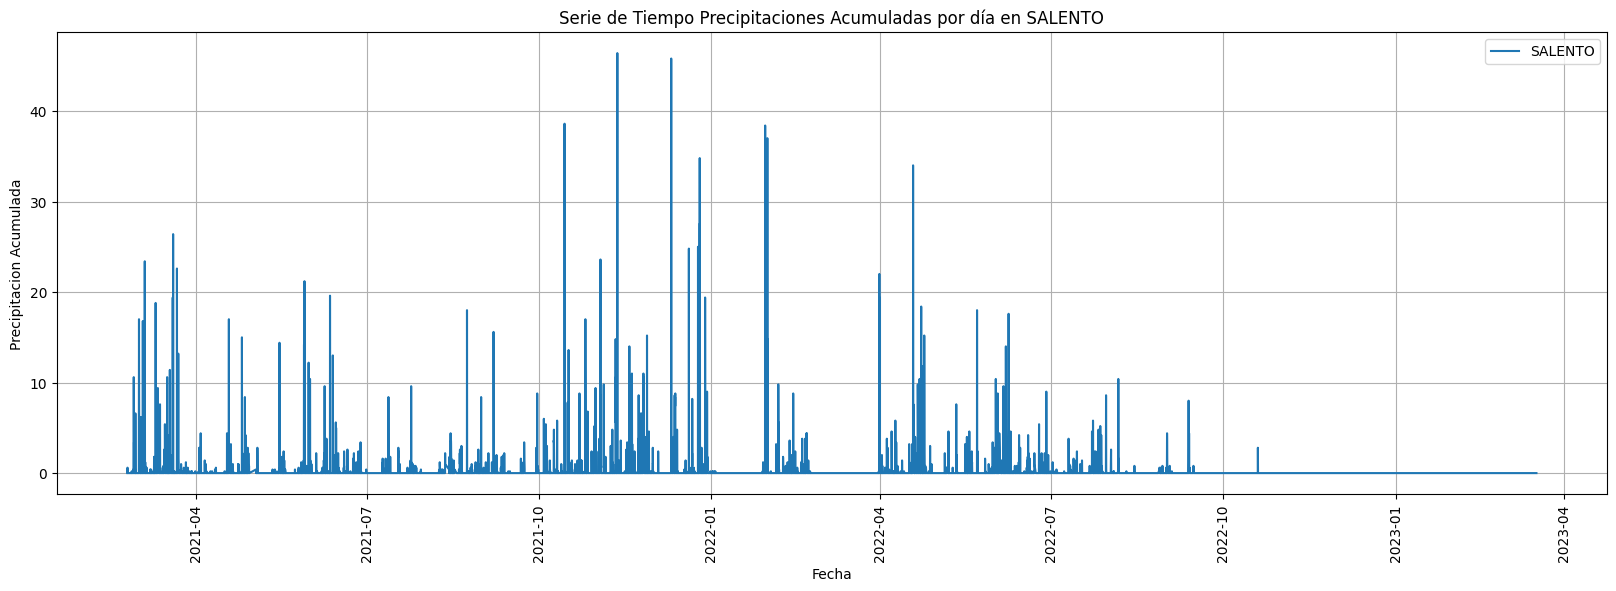

In [60]:
plt.figure(figsize=(20, 6))
plt.plot(df_precipitaciones['Fecha'], df_precipitaciones['Precipitacion_Acumulada'], label='SALENTO')
plt.title(f'Serie de Tiempo Precipitaciones Acumuladas por día en SALENTO')
plt.xlabel('Fecha')
plt.ylabel('Precipitacion Acumulada')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

**JOIN -> FALLAS - PRECIPITACIONES**

Se procede a realizar la union entre los dataset: "ds_fallas_temperatura": Fallas y "df_precipitaciones": Clima mediante un join de tipo inner con el objetivo con el obejtivo de hacer matchs exactos de los registros según fecha (por hora):

In [61]:
ds_fallas_temperatura_precipitaciones = ds_fallas_temperatura.merge(df_precipitaciones, on='Fecha', how='inner')

Comprobamos la estructura de nuestro nuevo dataset conformado entre las fallas-Temperatura y la variable Precipitaciones Promedio:

In [62]:
ds_fallas_temperatura_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 992
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Fecha                    993 non-null    datetime64[ns] 
 1   Zona                     993 non-null    category       
 2   Duracion_Falla           993 non-null    timedelta64[ns]
 3   Temperatura_Promedio     993 non-null    float64        
 4   Precipitacion_Acumulada  993 non-null    float64        
dtypes: category(1), datetime64[ns](1), float64(2), timedelta64[ns](1)
memory usage: 39.9 KB


Validamos a nivel general nuestro dataset recientemente constuido:

In [63]:
ds_fallas_temperatura_precipitaciones

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada
0,2021-03-28 21:00:00,U,0 days 13:23:00,15.2,0.0
1,2022-02-04 08:00:00,U,0 days 02:21:00,16.2,0.0
2,2022-03-31 21:00:00,U,0 days 14:54:00,15.3,0.2
3,2022-07-17 09:00:00,U,1 days 00:46:00,17.0,0.0
4,2022-08-05 14:00:00,U,0 days 02:36:00,20.3,0.0
...,...,...,...,...,...
988,2023-02-11 14:00:00,R,0 days 03:03:00,22.8,0.0
989,2023-02-13 09:00:00,R,0 days 02:07:00,20.4,0.0
990,2023-02-15 17:00:00,U,0 days 20:04:00,17.0,0.0
991,2023-02-24 17:00:00,R,0 days 16:32:00,18.0,0.0


Procedemos a validar registros duplicados del dataset previamente conformado evidenciando que efectivamente NO se tienen registros duplicados:

In [64]:
ds_fallas_temperatura_precipitaciones[ds_fallas_temperatura_precipitaciones.duplicated()] #Validamos si hay filas duplicadas

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada


Validamos que NO se cuente con registros nulos:

In [65]:
ds_fallas_temperatura_precipitaciones.isnull().sum()

Fecha                      0
Zona                       0
Duracion_Falla             0
Temperatura_Promedio       0
Precipitacion_Acumulada    0
dtype: int64

# *-------------------------------- (ETL) VELOCIDAD DEL VIENTO --------------------------------------*

En el siguiente apartado realizamos la Extracción, Transformación y Carga del dataset de la variable climatologica: VELOCIDAD DEL VIENTO.

In [66]:
df_viento = pd.read_csv('Velocidad_Viento.csv')
df_viento

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,26125501,103,05/27/2017 12:10:00 AM,1.200000,GENOVA - AUT,QUINDÍO,GÉNOVA,CAUCA,4.204417,-75.768667,Velocidad Viento (10 min),m/s
1,26125290,103,05/18/2012 05:30:00 AM,0.300000,ARMENIA - AUT,QUINDÍO,ARMENIA,CAUCA,4.531583,-75.690694,Velocidad Viento (10 min),m/s
2,26125509,103,08/04/2018 01:30:00 AM,0.003787,ESPERANZA LA - AUT,QUINDÍO,PIJAO,CAUCA,4.299444,-75.725081,Velocidad Viento (10 min),m/s
3,26125290,103,02/14/2007 09:10:00 AM,1.500000,ARMENIA - AUT,QUINDÍO,ARMENIA,CAUCA,4.531583,-75.690694,Velocidad Viento (10 min),m/s
4,26125290,103,03/25/2012 01:50:00 PM,2.500000,ARMENIA - AUT,QUINDÍO,ARMENIA,CAUCA,4.531583,-75.690694,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
4046493,26125061,111,10/10/2023 07:34:00 AM,2.600000,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722,-75.766389,GPRS - VELOCIDAD DEL VIENTO,m/s
4046494,26125061,111,10/10/2023 12:32:00 AM,2.000000,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722,-75.766389,GPRS - VELOCIDAD DEL VIENTO,m/s
4046495,26125061,111,10/10/2023 03:06:00 AM,1.700000,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722,-75.766389,GPRS - VELOCIDAD DEL VIENTO,m/s
4046496,26125061,111,10/10/2023 10:48:00 PM,1.900000,AEROPUERTO EL EDEN -,QUINDÍO,ARMENIA,CAUCA,4.454722,-75.766389,GPRS - VELOCIDAD DEL VIENTO,m/s


Observamos la estructura de nuestro dataset de Velocidad del Viento cargado:

In [67]:
df_viento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046498 entries, 0 to 4046497
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 370.5+ MB


### **Eliminación de variables Irrelevantes:**
Se deciden borrar las siguientes variables por no aportar información relevante al caso de estudio:

- **CodigoEstacion**
- **CodigoSensor**
- **NombreEstacion**
- **Departamento**
- **ZonaHidrografica**
- **Latitud**
- **Longitud**
- **DescripcionSensor**
- **UnidadMedida**

In [68]:
df_viento.drop('CodigoEstacion', axis=1, inplace=True)
df_viento.drop('CodigoSensor', axis=1, inplace=True)
df_viento.drop('NombreEstacion', axis=1, inplace=True)
df_viento.drop('Departamento', axis=1, inplace=True)
df_viento.drop('ZonaHidrografica', axis=1, inplace=True)
df_viento.drop('Latitud', axis=1, inplace=True)
df_viento.drop('Longitud', axis=1, inplace=True)
df_viento.drop('DescripcionSensor', axis=1, inplace=True)
df_viento.drop('UnidadMedida', axis=1, inplace=True)

df_viento

,FechaObservacion,ValorObservado,Municipio
0,05/27/2017 12:10:00 AM,1.200000,GÉNOVA
1,05/18/2012 05:30:00 AM,0.300000,ARMENIA
2,08/04/2018 01:30:00 AM,0.003787,PIJAO
3,02/14/2007 09:10:00 AM,1.500000,ARMENIA
4,03/25/2012 01:50:00 PM,2.500000,ARMENIA
...,...,...,...
4046493,10/10/2023 07:34:00 AM,2.600000,ARMENIA
4046494,10/10/2023 12:32:00 AM,2.000000,ARMENIA
4046495,10/10/2023 03:06:00 AM,1.700000,ARMENIA
4046496,10/10/2023 10:48:00 PM,1.900000,ARMENIA


Validamos los Municipios que se consideran en nuestro dataset de Velocidad del Viento:

In [69]:
print(df_viento['Municipio'].unique()) # Varificamos valores únicos de los municipios

['GÉNOVA' 'ARMENIA' 'PIJAO' 'BUENAVISTA' 'MONTENEGRO' 'CALARCÁ' 'SALENTO'
 'CÓRDOBA' 'CIRCASIA']


Como nuestro objetivo es trabajar solamente con el municipio de SALENTO se procede a eliminar los registros de temperatura relacionados a los municipios de 'ARMENIA', 'BUENAVISTA', 'CALARCÁ', 'MONTENEGRO' y 'PIJAO'

In [70]:
# Eliminar las filas donde el municipio es 'GÉNOVA', 'ARMENIA', 'PIJAO', 'BUENAVISTA', 'MONTENEGRO', 'CALARCÁ', 'CÓRDOBA' y 'CIRCASIA', ya que nuestro objetivo es trabajar solamente con datos de SALENTO:
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'GÉNOVA'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'ARMENIA'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'PIJAO'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'BUENAVISTA'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'MONTENEGRO'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'CALARCÁ'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'CÓRDOBA'].index)
df_viento = df_viento.drop(df_viento[df_viento['Municipio'] == 'CIRCASIA'].index)

df_viento

,FechaObservacion,ValorObservado,Municipio
16,01/23/2019 03:10:00 AM,0.0,SALENTO
93,07/23/2018 12:00:00 AM,8.1,SALENTO
103,08/10/2019 08:50:00 PM,1.6,SALENTO
119,10/07/2018 01:40:00 PM,14.1,SALENTO
139,07/01/2018 10:00:00 AM,11.4,SALENTO
...,...,...,...
3885643,03/17/2023 12:20:00 AM,1.0,SALENTO
3885669,03/17/2023 02:40:00 AM,0.8,SALENTO
3885715,03/17/2023 02:50:00 AM,1.0,SALENTO
3886037,03/17/2023 01:20:00 AM,0.5,SALENTO


Comprobamos que efectivamente nuestro único municipio de estudio dentro del dataset es: "SALENTO"

In [71]:
print(df_viento['Municipio'].unique()) # Varificamos valores únicos de los municipios

['SALENTO']


Hecho lo anterior; procedemos a eliminar el campo "Municipio" por ser irrelevante para nuestros modelos venideros:

In [72]:
df_viento.drop('Municipio', axis=1, inplace=True)
df_viento

,FechaObservacion,ValorObservado
16,01/23/2019 03:10:00 AM,0.0
93,07/23/2018 12:00:00 AM,8.1
103,08/10/2019 08:50:00 PM,1.6
119,10/07/2018 01:40:00 PM,14.1
139,07/01/2018 10:00:00 AM,11.4
...,...,...
3885643,03/17/2023 12:20:00 AM,1.0
3885669,03/17/2023 02:40:00 AM,0.8
3885715,03/17/2023 02:50:00 AM,1.0
3886037,03/17/2023 01:20:00 AM,0.5


Asignamos tipo de dato: "datetime64" a nuestro campo: "FechaObservacion" NOTA: Al campo: "ValorObservado" no hay necesidad de hacerle cambio alguno toda vez que se observa que el tipo de datos le fue correctameten asignado -> "float64"

In [73]:
#Definimos el tipo de dato para la fecha y el municipio
df_viento['FechaObservacion'] = pd.to_datetime(df_viento['FechaObservacion'])
df_viento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244496 entries, 16 to 3886052
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   FechaObservacion  244496 non-null  datetime64[ns]
 1   ValorObservado    244496 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 MB


A raiz de que nuestro dataset: "df_viento" contiene informacíón de diversas fechas; procedemos a depurar la data para el periodo de estudio comprendido entre el: 2022-01-01 y el 2023-06-30:

In [74]:
#Filtramos únicamente el periodo que necesitamos
fecha_inicio = pd.to_datetime('2021-01-01')
fecha_limite = pd.to_datetime('2023-06-30')
df_viento = df_viento.loc[(df_viento['FechaObservacion'] >= fecha_inicio) & (df_viento['FechaObservacion']<= fecha_limite)]
print(df_viento['FechaObservacion'].min())
print(df_viento['FechaObservacion'].max())

2021-02-23 09:10:00
2023-03-17 04:20:00


Validamos a nivel general que la depuración aplicada sea satisfactoria:

In [75]:
df_viento

,FechaObservacion,ValorObservado
420753,2022-09-15 16:10:00,1.9
543165,2022-09-15 02:40:00,0.6
2571986,2022-09-15 09:50:00,0.9
2663604,2022-09-15 14:00:00,1.3
3051810,2021-02-23 23:40:00,1.8
...,...,...
3885643,2023-03-17 00:20:00,1.0
3885669,2023-03-17 02:40:00,0.8
3885715,2023-03-17 02:50:00,1.0
3886037,2023-03-17 01:20:00,0.5


Comprobamos registros duplicados dentro de nuestro dataset de Velocidad del Viento.

In [76]:
#Verificamos si hay valores nulos
df_viento.isnull().sum()

FechaObservacion    0
ValorObservado      0
dtype: int64

Ordenamos nuestro dataset:

In [77]:
#ordenamos dataset por fecha
df_viento = df_viento.sort_values(by='FechaObservacion', ascending=True)
df_viento

,FechaObservacion,ValorObservado
3051887,2021-02-23 09:10:00,1.5
3052236,2021-02-23 10:50:00,2.4
3052443,2021-02-23 11:00:00,1.6
3052361,2021-02-23 11:10:00,1.9
3052027,2021-02-23 11:20:00,2.3
...,...,...
3886052,2023-03-17 03:40:00,0.8
3884949,2023-03-17 03:50:00,0.4
3884726,2023-03-17 04:00:00,0.9
3885557,2023-03-17 04:10:00,0.6


Teniendo en cuenta que los valores de la Velocidad del viento estan registrados cada 10 minutos durante el día, se opta por realizar un promedio por cada hora en cada uno de los municipios:

Para lo cual; en primera instancia se llevan las fechas de observaciones a la hora piso:

In [78]:
df_viento['FechaObservacion'] = df_viento['FechaObservacion'].dt.floor('H') # Establecer los minutos y segundos en 00:00:00

df_viento

,FechaObservacion,ValorObservado
3051887,2021-02-23 09:00:00,1.5
3052236,2021-02-23 10:00:00,2.4
3052443,2021-02-23 11:00:00,1.6
3052361,2021-02-23 11:00:00,1.9
3052027,2021-02-23 11:00:00,2.3
...,...,...
3886052,2023-03-17 03:00:00,0.8
3884949,2023-03-17 03:00:00,0.4
3884726,2023-03-17 04:00:00,0.9
3885557,2023-03-17 04:00:00,0.6


Acto seguido, se procede a calcular el valor promediado por hora de los valores observados y se renombra el campo: "FechaObservacion" por "Fecha", y el campo: "ValorObservado" por: "Velocidad_Viento_Promedio":

In [79]:
# Agrupamos los datos por 'FechaObservacion' y se calcula el acumulado diario de 'ValorObservado'
df_viento = df_viento.groupby(['FechaObservacion'])['ValorObservado'].mean().reset_index()

# Renombramos las columnas para mayor claridad
df_viento.columns = ['Fecha','Velocidad_Viento_Promedio']

df_viento

,Fecha,Velocidad_Viento_Promedio
0,2021-02-23 09:00:00,1.500000
1,2021-02-23 10:00:00,2.400000
2,2021-02-23 11:00:00,2.100000
3,2021-02-23 12:00:00,1.566667
4,2021-02-23 13:00:00,2.166667
...,...,...
13703,2023-03-17 00:00:00,0.800000
13704,2023-03-17 01:00:00,0.516667
13705,2023-03-17 02:00:00,0.500000
13706,2023-03-17 03:00:00,0.666667


Comprobamos que los registros del dataset de Velocidad del Viento se encuentren dentro del periodo de estudio (Desde 2022-01-01 hasta el 2023-06-30):

In [80]:
print('Fecha MIN ->',df_viento['Fecha'].min())
print('Fecha MAX ->',df_viento['Fecha'].max())

print('Valor MIN ->',df_viento['Velocidad_Viento_Promedio'].min())
print('Valor MAX ->',df_viento['Velocidad_Viento_Promedio'].max())

Fecha MIN -> 2021-02-23 09:00:00
Fecha MAX -> 2023-03-17 04:00:00
Valor MIN -> 0.21666666666666667
Valor MAX -> 9.483333333333333


Observamos la estructura de nuestro dataset de Velocidad del Viento:

In [81]:
df_viento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha                      13708 non-null  datetime64[ns]
 1   Velocidad_Viento_Promedio  13708 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 214.3 KB


Procedemos a diagramar el comportamiento de la variable de Velocidad del Viento del municipio de Salento durante el tiempo correspondiente

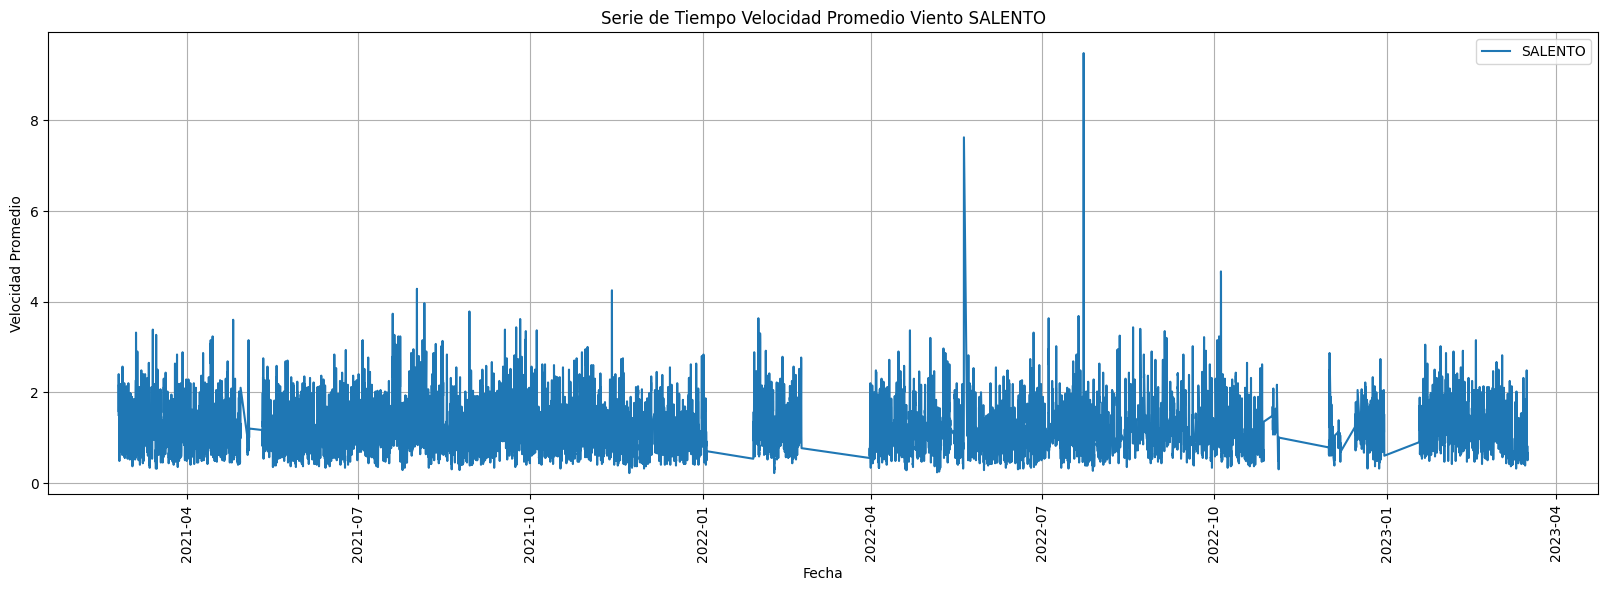

In [82]:
plt.figure(figsize=(20, 6))
plt.plot(df_viento['Fecha'], df_viento['Velocidad_Viento_Promedio'], label='SALENTO')
plt.title(f'Serie de Tiempo Velocidad Promedio Viento SALENTO')
plt.xlabel('Fecha')
plt.ylabel('Velocidad Promedio')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

**JOIN -> FALLAS - VELOCIDAD DEL VIENTO**

Se procede a realizar la union entre los dataset: "ds_fallas_temperatura_precipitacione": Fallas y "df_viento": Clima mediante un join de tipo inner con el objetivo con el obejtivo de hacer matchs exactos de los registros según fecha (por hora):

In [83]:
ds_fallas_temperatura_precipitaciones_viento = ds_fallas_temperatura_precipitaciones.merge(df_viento, on='Fecha', how='inner')

Comprobamos la estructura de nuestro nuevo dataset conformado entre las fallas, Temperatura, Precipitaciones y la variable Velocidad del Viento Promedio:

In [84]:
ds_fallas_temperatura_precipitaciones_viento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 969
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Fecha                      970 non-null    datetime64[ns] 
 1   Zona                       970 non-null    category       
 2   Duracion_Falla             970 non-null    timedelta64[ns]
 3   Temperatura_Promedio       970 non-null    float64        
 4   Precipitacion_Acumulada    970 non-null    float64        
 5   Velocidad_Viento_Promedio  970 non-null    float64        
dtypes: category(1), datetime64[ns](1), float64(3), timedelta64[ns](1)
memory usage: 46.5 KB


Observamos a nivel general nuestro dataset conformado:

In [85]:
ds_fallas_temperatura_precipitaciones_viento

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-03-28 21:00:00,U,0 days 13:23:00,15.2,0.0,1.450000
1,2022-02-04 08:00:00,U,0 days 02:21:00,16.2,0.0,1.066667
2,2022-03-31 21:00:00,U,0 days 14:54:00,15.3,0.2,0.583333
3,2022-07-17 09:00:00,U,1 days 00:46:00,17.0,0.0,0.916667
4,2022-08-05 14:00:00,U,0 days 02:36:00,20.3,0.0,0.800000
...,...,...,...,...,...,...
965,2023-02-11 14:00:00,R,0 days 03:03:00,22.8,0.0,1.966667
966,2023-02-13 09:00:00,R,0 days 02:07:00,20.4,0.0,1.400000
967,2023-02-15 17:00:00,U,0 days 20:04:00,17.0,0.0,1.350000
968,2023-02-24 17:00:00,R,0 days 16:32:00,18.0,0.0,0.733333


Procedemos a validar registros duplicados del dataset previamente conformado evidenciando que efectivamente NO se tienen registros duplicados:

In [86]:
ds_fallas_temperatura_precipitaciones_viento[ds_fallas_temperatura_precipitaciones_viento.duplicated()] #Validamos si hay filas duplicadas

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio


Procedemos a validar registros nulos dentro de nuestro dataset, evidenciando ausencia de estos en el mismo:

In [87]:
ds_fallas_temperatura_precipitaciones_viento.isnull().sum() # Valisamos si hay registros nulos

Fecha                        0
Zona                         0
Duracion_Falla               0
Temperatura_Promedio         0
Precipitacion_Acumulada      0
Velocidad_Viento_Promedio    0
dtype: int64

Validamos que nuestros registros se encuentren dentro del periodo de estudio correspondiente: 2023-01-01 y 2023-06-30:

In [88]:
print('Fecha MIN ->',ds_fallas_temperatura_precipitaciones_viento['Fecha'].min())
print('Fecha MAX ->',ds_fallas_temperatura_precipitaciones_viento['Fecha'].max())

print('Valor MIN ->',ds_fallas_temperatura_precipitaciones_viento['Duracion_Falla'].min())
print('Valor MAX ->',ds_fallas_temperatura_precipitaciones_viento['Duracion_Falla'].max())

Fecha MIN -> 2021-02-25 15:00:00
Fecha MAX -> 2023-03-15 10:00:00
Valor MIN -> 0 days 00:00:00
Valor MAX -> 50 days 07:15:00


## COMPLEMENTACIÓN DATASET FALLAS-CLIMA ##

Hasta el momento; hemos realizado la construcción de nuestro dataset: "**ds_fallas_temperatura_precipitaciones_viento**" el cual posee un total de: 970 registros de fallas con sus respectivos valores de condiciones climaticas al momento de la ocurrencia, en el siguiente apartado; procederemos a realizar el complemento de nuestro dataset del proyecto, con la construcción de nuestro dataset de NO fallas, el cual contiene los valores de condiciones climaticas al momento de la NO ocurrencia:

En primera instancia; procedemos a generar un rango de fechas desde "2021-01-01 00:00:00" hasta "2023-06-30 24:00:00" (Periodo de estudio), y en el dataset: "ds_no_fallas_elementos" procedemos a filtrar las fechas que tienen el mismo día que ds_fallas_elementos para asi suprimirlas del primero, logrando con ello tener un dataset de NO Fallas con fechas de días diferentes a los días en que si hubo fallas:

In [89]:

# Suponiendo que ya tienes el DataFrame ds_fallas_elementos con la columna 'Fecha'
# y que has establecido que la columna 'Fecha' está en formato datetime

# Crear un rango de fechas desde "2021-01-01 00:00:00" hasta "2023-06-30 24:00:00"
rango_fechas = pd.date_range(start="2021-01-01 00:00:00", end="2023-06-30 23:59:59", freq='H')

# Crear un DataFrame con las fechas del rango
ds_no_fallas_elementos = pd.DataFrame({'Fecha': rango_fechas})

# Filtrar las fechas que tienen el mismo día que ds_fallas_elementos
ds_no_fallas_elementos = ds_no_fallas_elementos[~ds_no_fallas_elementos['Fecha'].dt.date.isin(ds_fallas_elementos['Fecha'].dt.date)]

# Imprimir el nuevo DataFrame
ds_no_fallas_elementos


,Fecha
24,2021-01-02 00:00:00
25,2021-01-02 01:00:00
26,2021-01-02 02:00:00
27,2021-01-02 03:00:00
28,2021-01-02 04:00:00
...,...
21811,2023-06-28 19:00:00
21812,2023-06-28 20:00:00
21813,2023-06-28 21:00:00
21814,2023-06-28 22:00:00


Procedemos a complementar nuestro datase: "ds_no_fallas_elementos" con los valores que tenian la variable climatica "Temperatura" en el momento de la NO ocurrencia de las fallas:

In [90]:
ds_no_fallas_temperatura = ds_no_fallas_elementos.merge(df_temperatura, on='Fecha', how='inner')

Validamos de manera generar como quedó conformado nuestro dataset: "ds_no_fallas_temperatura":

In [91]:
ds_no_fallas_temperatura

,Fecha,Temperatura_Promedio
0,2021-02-24 00:00:00,13.6
1,2021-02-24 01:00:00,13.4
2,2021-02-24 02:00:00,13.5
3,2021-02-24 03:00:00,12.9
4,2021-02-24 04:00:00,12.5
...,...,...
4339,2023-03-16 19:00:00,16.9
4340,2023-03-16 20:00:00,16.5
4341,2023-03-16 21:00:00,15.7
4342,2023-03-16 22:00:00,14.8


Procedemos a complementar nuestro datase: "ds_no_fallas_elementos" con los valores que tenian la variable climatica "Precipitaciones" en el momento de la NO ocurrencia de las fallas:

In [92]:
ds_no_fallas_temperatura_precipitaciones = ds_no_fallas_temperatura.merge(df_precipitaciones, on='Fecha', how='inner')

Validamos de manera generar como quedó conformado nuestro dataset: "ds_no_fallas_temperatura_precipitaciones":

In [93]:
ds_no_fallas_temperatura_precipitaciones

,Fecha,Temperatura_Promedio,Precipitacion_Acumulada
0,2021-02-24 00:00:00,13.6,0.0
1,2021-02-24 01:00:00,13.4,0.0
2,2021-02-24 02:00:00,13.5,0.0
3,2021-02-24 03:00:00,12.9,0.0
4,2021-02-24 04:00:00,12.5,0.0
...,...,...,...
4291,2023-03-16 19:00:00,16.9,0.0
4292,2023-03-16 20:00:00,16.5,0.0
4293,2023-03-16 21:00:00,15.7,0.0
4294,2023-03-16 22:00:00,14.8,0.0


Procedemos a complementar nuestro datase: "ds_no_fallas_elementos" con los valores que tenian la variable climatica "Velocidad del Viento" en el momento de la NO ocurrencia de las fallas:

In [94]:
ds_no_fallas_temperatura_precipitaciones_viento = ds_no_fallas_temperatura_precipitaciones.merge(df_viento, on='Fecha', how='inner')

Validamos de manera generar como quedó conformado nuestro dataset: "ds_no_fallas_temperatura_precipitaciones_viento":

In [95]:
ds_no_fallas_temperatura_precipitaciones_viento

,Fecha,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-02-24 00:00:00,13.6,0.0,1.316667
1,2021-02-24 01:00:00,13.4,0.0,1.350000
2,2021-02-24 02:00:00,13.5,0.0,1.116667
3,2021-02-24 03:00:00,12.9,0.0,1.133333
4,2021-02-24 04:00:00,12.5,0.0,1.283333
...,...,...,...,...
4210,2023-03-16 19:00:00,16.9,0.0,0.566667
4211,2023-03-16 20:00:00,16.5,0.0,0.566667
4212,2023-03-16 21:00:00,15.7,0.0,0.650000
4213,2023-03-16 22:00:00,14.8,0.0,0.816667


Validamos que los topes maximos y minimos de nuestras 3 variables climatologicas de nuestro datase de FALLAS se encuentren dentro de nuestro periodo de estudio:

In [96]:
print('Fecha MIN ->',ds_fallas_temperatura_precipitaciones_viento['Fecha'].min())
print('Fecha MAX ->',ds_fallas_temperatura_precipitaciones_viento['Fecha'].max())

print('Valor MIN Velocidad_Viento_Promedio ->',ds_fallas_temperatura_precipitaciones_viento['Velocidad_Viento_Promedio'].min())
print('Valor MAX Velocidad_Viento_Promedio ->',ds_fallas_temperatura_precipitaciones_viento['Velocidad_Viento_Promedio'].max())

print('Valor MIN Precipitacion_acumulada ->',ds_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].min())
print('Valor MAX Precipitacion_acumulada ->',ds_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].max())
print('Valor PROMEDIO Precipitacion_acumulada ->',ds_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].mean())

print('Valor MIN Temperatura_Promedio ->',ds_fallas_temperatura_precipitaciones_viento['Temperatura_Promedio'].min())
print('Valor MAX Temperatura_Promedio ->',ds_fallas_temperatura_precipitaciones_viento['Temperatura_Promedio'].max())

Fecha MIN -> 2021-02-25 15:00:00
Fecha MAX -> 2023-03-15 10:00:00
Valor MIN Velocidad_Viento_Promedio -> 0.31666666666666665
Valor MAX Velocidad_Viento_Promedio -> 3.733333333333333
Valor MIN Precipitacion_acumulada -> 0.0
Valor MAX Precipitacion_acumulada -> 45.8
Valor PROMEDIO Precipitacion_acumulada -> 0.6422680412371135
Valor MIN Temperatura_Promedio -> 11.2
Valor MAX Temperatura_Promedio -> 27.5


Validamos que los topes maximos y minimos de nuestras 3 variables climatologicas de nuestro datase de NO FALLAS se encuentren dentro de nuestro periodo de estudio:

In [97]:
print('Fecha MIN ->',ds_no_fallas_temperatura_precipitaciones_viento['Fecha'].min())
print('Fecha MAX ->',ds_no_fallas_temperatura_precipitaciones_viento['Fecha'].max())

print('Valor MIN Velocidad_Viento_Promedio ->',ds_no_fallas_temperatura_precipitaciones_viento['Velocidad_Viento_Promedio'].min())
print('Valor MAX Velocidad_Viento_Promedio ->',ds_no_fallas_temperatura_precipitaciones_viento['Velocidad_Viento_Promedio'].max())

print('Valor MIN Precipitacion_acumulada ->',ds_no_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].min())
print('Valor MAX Precipitacion_acumulada ->',ds_no_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].max())
print('Valor PROMEDIO Precipitacion_acumulada ->',ds_no_fallas_temperatura_precipitaciones_viento['Precipitacion_Acumulada'].mean())

print('Valor MIN Temperatura_Promedio ->',ds_no_fallas_temperatura_precipitaciones_viento['Temperatura_Promedio'].min())
print('Valor MAX Temperatura_Promedio ->',ds_no_fallas_temperatura_precipitaciones_viento['Temperatura_Promedio'].max())

Fecha MIN -> 2021-02-24 00:00:00
Fecha MAX -> 2023-03-16 23:00:00
Valor MIN Velocidad_Viento_Promedio -> 0.21666666666666667
Valor MAX Velocidad_Viento_Promedio -> 4.666666666666667
Valor MIN Precipitacion_acumulada -> 0.0
Valor MAX Precipitacion_acumulada -> 21.2
Valor PROMEDIO Precipitacion_acumulada -> 0.18932384341637012
Valor MIN Temperatura_Promedio -> 10.3
Valor MAX Temperatura_Promedio -> 25.7


Hasta el momento; hemos logrado la construcción de un datase de FALLAS con 1984  registros y uno de NO FALLAS con: 4215 registros, que como se puede observar; se encuentran muy desbalancenado a nivel de cantidades; por lo cual a continuación procederemos a solucionar lo anterior:

En primera instanacia, realizamos la separación de aquellas fallas cuya curación se encuentra por ENCIMA de los 5 minutos, dichos registros que NO cumplan con esta condición serán considerados NO FALLAS y serán la base de nuestro Datase de NO FALLAS definitivo, los demás serán los registros considerados de FALLAS:

In [ ]:
Dataset_Fallas_Clima = ds_fallas_temperatura_precipitaciones_viento[ds_fallas_temperatura_precipitaciones_viento['Duracion_Falla'] > pd.Timedelta(days=0, hours=0, minutes=5)]

Quedando nuestro datase de "Dataset_Fallas_Clima" con 958 registros:

In [ ]:
Dataset_Fallas_Clima

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-03-28 21:00:00,U,0 days 13:23:00,15.2,0.0,1.450000
1,2022-02-04 08:00:00,U,0 days 02:21:00,16.2,0.0,1.066667
2,2022-03-31 21:00:00,U,0 days 14:54:00,15.3,0.2,0.583333
3,2022-07-17 09:00:00,U,1 days 00:46:00,17.0,0.0,0.916667
4,2022-08-05 14:00:00,U,0 days 02:36:00,20.3,0.0,0.800000
...,...,...,...,...,...,...
965,2023-02-11 14:00:00,R,0 days 03:03:00,22.8,0.0,1.966667
966,2023-02-13 09:00:00,R,0 days 02:07:00,20.4,0.0,1.400000
967,2023-02-15 17:00:00,U,0 days 20:04:00,17.0,0.0,1.350000
968,2023-02-24 17:00:00,R,0 days 16:32:00,18.0,0.0,0.733333


Como ya usamos la separación de nuestro dataset mediante el campo "Duracion_Falla" y ya no nos es de útilidad; procedemos con la eliminación del mismo:

In [ ]:
Dataset_Fallas_Clima.drop('Duracion_Falla', axis=1, inplace=True)

<ipython-input-255-42062ca7506d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_Fallas_Clima.drop('Duracion_Falla', axis=1, inplace=True)


Observamos que nuestro dataset: "Dataset_Fallas_Clima" se redujo a 958 registros:

In [ ]:
Dataset_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000
...,...,...,...,...,...
965,2023-02-11 14:00:00,R,22.8,0.0,1.966667
966,2023-02-13 09:00:00,R,20.4,0.0,1.400000
967,2023-02-15 17:00:00,U,17.0,0.0,1.350000
968,2023-02-24 17:00:00,R,18.0,0.0,0.733333


Procedemos a validar registros duplicados en nuestro dataset: "Dataset_Fallas_Clima":

In [ ]:
Dataset_Fallas_Clima[Dataset_Fallas_Clima.duplicated()]

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
7,2021-06-12 07:00:00,R,13.1,0.0,0.950000
12,2021-04-09 12:00:00,R,18.8,0.0,1.866667
13,2021-04-09 12:00:00,R,18.8,0.0,1.866667
14,2021-04-09 12:00:00,R,18.8,0.0,1.866667
15,2021-04-09 12:00:00,R,18.8,0.0,1.866667
...,...,...,...,...,...
781,2021-08-03 06:00:00,R,13.9,0.0,0.816667
788,2023-01-25 09:00:00,R,15.5,0.0,0.866667
798,2021-08-05 08:00:00,R,19.3,0.0,0.766667
877,2021-12-23 08:00:00,R,16.6,0.0,1.066667


Y finalmente procedemos con la eliminación de los 197 registros duplicados encontrados previamente:

In [ ]:
# Eliminar registros duplicados basados en todas las columnas
Dataset_Fallas_Clima = Dataset_Fallas_Clima.drop_duplicates()

Quedando finalmente 761 registros en nuestro Dataset: "Dataset_Fallas_Clima"

In [ ]:
Dataset_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000
...,...,...,...,...,...
965,2023-02-11 14:00:00,R,22.8,0.0,1.966667
966,2023-02-13 09:00:00,R,20.4,0.0,1.400000
967,2023-02-15 17:00:00,U,17.0,0.0,1.350000
968,2023-02-24 17:00:00,R,18.0,0.0,0.733333


En segunda instanacia; realizamos la separación de aquellas fallas cuya duración se encuentra por DEBAJO de los 5 minutos, dichos registros que NO cumplan con esta condición fueron considerados FALLAS y son la base de nuestro Datase de FALLAS definitivo, los demás serán los registros considerados de NO FALLAS:

In [ ]:
Dataset_No_Fallas_Clima = ds_fallas_temperatura_precipitaciones_viento[ds_fallas_temperatura_precipitaciones_viento['Duracion_Falla'] <= pd.Timedelta(days=0, hours=0, minutes=5)]#.sort_values(by='Velocidad_Viento_Promedio', ascending=False)

Coprobamos una vez más a nivel general nuestro datase: "Dataset_No_Fallas_Clima" creando en los apastados anteriores:

In [ ]:
Dataset_No_Fallas_Clima

,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
22,2021-06-01 11:00:00,R,0 days 00:04:00,21.2,0.0,1.933333
25,2021-06-04 08:00:00,R,0 days 00:00:00,15.8,0.0,0.783333
31,2021-06-12 19:00:00,R,0 days 00:00:00,18.1,0.0,0.633333
55,2021-07-06 10:00:00,R,0 days 00:00:00,22.0,0.0,1.950000
205,2022-12-23 18:00:00,R,0 days 00:00:00,19.6,0.0,1.366667
258,2021-09-27 11:00:00,R,0 days 00:01:00,21.9,0.0,2.200000
353,2021-05-19 11:00:00,R,0 days 00:02:00,20.1,0.0,2.083333
373,2022-10-27 07:00:00,R,0 days 00:05:00,15.5,0.0,0.816667
504,2022-12-19 20:00:00,U,0 days 00:00:00,16.5,0.0,0.783333
656,2022-12-18 14:00:00,R,0 days 00:00:00,19.0,0.0,2.066667


De los 4215 registros existentes de nuestro dataset: "ds_no_fallas_temperatura_precipitaciones_viento" seleccionamos de manera aleatoria tan solo 749 (Para así lograr alineados con nuestro datase de fallas en cuanto a cantidad) y los almacenamos en nuestro dataset: "Dataset_No_Fallas_Clima":

In [ ]:
# Seleccionar 946 registros de manera aleatoria
registros_aleatorios = ds_no_fallas_temperatura_precipitaciones_viento.sample(n=749, random_state=42)

# Concatenar los registros aleatorios al DataFrame Dataset_No_Fallas_Clima
Dataset_No_Fallas_Clima = pd.concat([Dataset_No_Fallas_Clima, registros_aleatorios], ignore_index=True)

# Imprimir el nuevo DataFrame con los registros añadidos
Dataset_No_Fallas_Clima


,Fecha,Zona,Duracion_Falla,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-06-01 11:00:00,R,0 days 00:04:00,21.2,0.0,1.933333
1,2021-06-04 08:00:00,R,0 days 00:00:00,15.8,0.0,0.783333
2,2021-06-12 19:00:00,R,0 days 00:00:00,18.1,0.0,0.633333
3,2021-07-06 10:00:00,R,0 days 00:00:00,22.0,0.0,1.950000
4,2022-12-23 18:00:00,R,0 days 00:00:00,19.6,0.0,1.366667
...,...,...,...,...,...,...
756,2021-02-28 06:00:00,NaN,NaT,14.3,0.0,0.850000
757,2021-11-06 01:00:00,NaN,NaT,13.2,0.0,1.366667
758,2021-03-21 11:00:00,NaN,NaT,21.5,0.0,2.016667
759,2023-03-12 20:00:00,NaN,NaT,15.2,0.0,0.583333


Como ya dimos uso a nuestra variable: "Duracion_Falla" en nuestro datase de NO FALLAS CLIMA, procedemos con el borrado de la misma:

In [ ]:
Dataset_No_Fallas_Clima.drop('Duracion_Falla', axis=1, inplace=True)
Dataset_No_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-06-01 11:00:00,R,21.2,0.0,1.933333
1,2021-06-04 08:00:00,R,15.8,0.0,0.783333
2,2021-06-12 19:00:00,R,18.1,0.0,0.633333
3,2021-07-06 10:00:00,R,22.0,0.0,1.950000
4,2022-12-23 18:00:00,R,19.6,0.0,1.366667
...,...,...,...,...,...
756,2021-02-28 06:00:00,NaN,14.3,0.0,0.850000
757,2021-11-06 01:00:00,NaN,13.2,0.0,1.366667
758,2021-03-21 11:00:00,NaN,21.5,0.0,2.016667
759,2023-03-12 20:00:00,NaN,15.2,0.0,0.583333


Procedemos a imputar nuestro campo "Zona" del dataset de NO FALLAS CLIMA con el valor de Moda de nuestro datase de FALLAS CLIMA:

In [ ]:
# Calcular la moda del campo "Zona" en Dataset_Fallas_Clima
moda_zona = Dataset_Fallas_Clima['Zona'].mode()[0]
print(moda_zona)

# Imputar los valores nulos en Dataset_No_Fallas_Clima con la moda
Dataset_No_Fallas_Clima['Zona'].fillna(moda_zona, inplace=True)

R


Comprobamos el cambio aplicado anteriormente:

In [ ]:
Dataset_No_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-06-01 11:00:00,R,21.2,0.0,1.933333
1,2021-06-04 08:00:00,R,15.8,0.0,0.783333
2,2021-06-12 19:00:00,R,18.1,0.0,0.633333
3,2021-07-06 10:00:00,R,22.0,0.0,1.950000
4,2022-12-23 18:00:00,R,19.6,0.0,1.366667
...,...,...,...,...,...
756,2021-02-28 06:00:00,R,14.3,0.0,0.850000
757,2021-11-06 01:00:00,R,13.2,0.0,1.366667
758,2021-03-21 11:00:00,R,21.5,0.0,2.016667
759,2023-03-12 20:00:00,R,15.2,0.0,0.583333


Procedemos a valiar valores duplicados en nuestro dataset: "Dataset_No_Fallas_Clima":

In [ ]:
Dataset_No_Fallas_Clima[Dataset_No_Fallas_Clima.duplicated()]

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio


Realizamos una comprobación general de nuestro dataset: "Dataset_No_Fallas_Clima":

In [ ]:
Dataset_No_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio
0,2021-06-01 11:00:00,R,21.2,0.0,1.933333
1,2021-06-04 08:00:00,R,15.8,0.0,0.783333
2,2021-06-12 19:00:00,R,18.1,0.0,0.633333
3,2021-07-06 10:00:00,R,22.0,0.0,1.950000
4,2022-12-23 18:00:00,R,19.6,0.0,1.366667
...,...,...,...,...,...
756,2021-02-28 06:00:00,R,14.3,0.0,0.850000
757,2021-11-06 01:00:00,R,13.2,0.0,1.366667
758,2021-03-21 11:00:00,R,21.5,0.0,2.016667
759,2023-03-12 20:00:00,R,15.2,0.0,0.583333


A continuación; procedemos a codificar en nuestro dataset: "Dataset_Fallas_Clima" el valor de ocurrencia de falla en 1 (Si hubo falla) y nuestro "Dataset_No_Fallas_Clima" el valor de ocurrencia de No falla en 0 (NO hubo falla):

In [ ]:
Dataset_Fallas_Clima['Falla'] = 1
Dataset_No_Fallas_Clima['Falla'] = 0

<ipython-input-268-3db3f464b367>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_Fallas_Clima['Falla'] = 1


Relizamos validación del cambio aplicado en nuestro dataset: "Dataset_Fallas_Clima":

In [ ]:
Dataset_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000,1
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667,1
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333,1
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667,1
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000,1
...,...,...,...,...,...,...
965,2023-02-11 14:00:00,R,22.8,0.0,1.966667,1
966,2023-02-13 09:00:00,R,20.4,0.0,1.400000,1
967,2023-02-15 17:00:00,U,17.0,0.0,1.350000,1
968,2023-02-24 17:00:00,R,18.0,0.0,0.733333,1


Y de igual manera realizamos validación del cambio aplicado en nuestro dataset: "Dataset_No_Fallas_Clima":

In [ ]:
Dataset_No_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,2021-06-01 11:00:00,R,21.2,0.0,1.933333,0
1,2021-06-04 08:00:00,R,15.8,0.0,0.783333,0
2,2021-06-12 19:00:00,R,18.1,0.0,0.633333,0
3,2021-07-06 10:00:00,R,22.0,0.0,1.950000,0
4,2022-12-23 18:00:00,R,19.6,0.0,1.366667,0
...,...,...,...,...,...,...
756,2021-02-28 06:00:00,R,14.3,0.0,0.850000,0
757,2021-11-06 01:00:00,R,13.2,0.0,1.366667,0
758,2021-03-21 11:00:00,R,21.5,0.0,2.016667,0
759,2023-03-12 20:00:00,R,15.2,0.0,0.583333,0


Realizamos una descripción estadística general de nuestro dataset: "Dataset_Fallas_Clima":

In [ ]:
Dataset_Fallas_Clima.describe()

,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
count,761.000000,761.000000,761.000000,761.0
mean,18.274639,0.585808,1.333548,1.0
std,3.061037,3.621821,0.594568,0.0
min,11.200000,0.000000,0.316667,1.0
25%,15.900000,0.000000,0.866667,1.0
50%,18.100000,0.000000,1.266667,1.0
75%,20.500000,0.000000,1.716667,1.0
max,27.500000,45.800000,3.733333,1.0


De igual manera; realizamos una descripción estadística general de nuestro dataset: "Dataset_No_Fallas_Clima":

In [ ]:
Dataset_No_Fallas_Clima.describe()

,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
count,761.000000,761.000000,761.000000,761.0
mean,16.914717,0.194481,1.159943,0.0
std,2.958968,1.141062,0.514331,0.0
min,11.200000,0.000000,0.266667,0.0
25%,14.700000,0.000000,0.783333,0.0
50%,16.100000,0.000000,1.050000,0.0
75%,19.200000,0.000000,1.466667,0.0
max,24.300000,17.000000,3.200000,0.0


**PROCEDEMOS A REALIZAR LA UNICIÓN DE NUESTROS DATASETS DE NO FALLAS Y DE FALLAS PARA CONFORMAR UNO SOLO**, casa uno con 761 registros respectivamente y conformamos un nuevo dataset completo denominado: "Dataset_Fallas_Clima_Procesado":

In [ ]:
Dataset_Fallas_Clima_Procesado = pd.concat([Dataset_Fallas_Clima, Dataset_No_Fallas_Clima], ignore_index=True)

Realizamos una comprobación general de nuestro dataset: "Dataset_Fallas_Clima_Procesado":

In [ ]:
Dataset_Fallas_Clima_Procesado

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000,1
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667,1
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333,1
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667,1
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000,1
...,...,...,...,...,...,...
1517,2021-02-28 06:00:00,R,14.3,0.0,0.850000,0
1518,2021-11-06 01:00:00,R,13.2,0.0,1.366667,0
1519,2021-03-21 11:00:00,R,21.5,0.0,2.016667,0
1520,2023-03-12 20:00:00,R,15.2,0.0,0.583333,0


Realizamos una descripción estadística general de nuestro nuevo dataset: "Dataset_Fallas_Clima_Procesado":

In [ ]:
Dataset_Fallas_Clima_Procesado.describe()

,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
count,1522.000000,1522.000000,1522.000000,1522.000000
mean,17.594678,0.390145,1.246746,0.500000
std,3.085355,2.691352,0.562459,0.500164
min,11.200000,0.000000,0.266667,0.000000
25%,15.100000,0.000000,0.816667,0.000000
50%,17.200000,0.000000,1.133333,0.500000
75%,20.100000,0.000000,1.583333,1.000000
max,27.500000,45.800000,3.733333,1.000000


Verificamos que efectivamente nuestro dataset se encuentra balanceado, con la misma cantidad de fallas como la de NO Fallas:

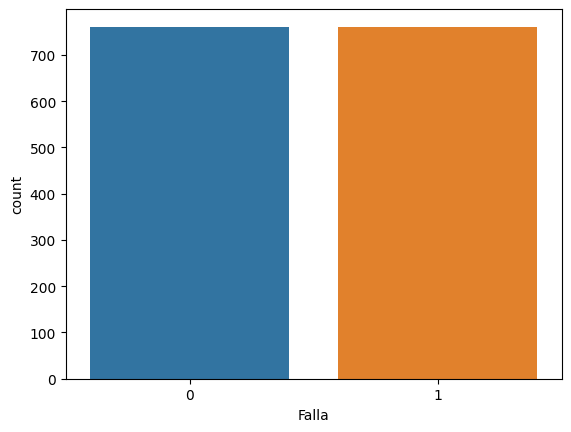

In [ ]:
import seaborn as sns
sns.countplot(x='Falla', data=Dataset_Fallas_Clima_Procesado)
plt.show()

De igual manera, realizamos una comprobación del balanceo de nuestro campo "Zona" evidenciando efectivamente mayoria en Zona "R" -> Rural.

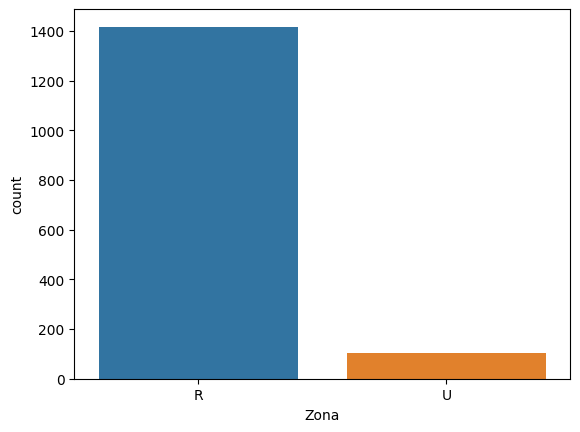

In [ ]:
sns.countplot(x='Zona', data=Dataset_Fallas_Clima_Procesado)
plt.show()

Procedemos a realizar una última verificación de valores duplicados de nuestro dataset: "Dataset_Fallas_Clima_Procesado":

In [ ]:
Dataset_Fallas_Clima_Procesado[Dataset_Fallas_Clima_Procesado.duplicated()]

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla


Finalmente; guardamos nuestro dataset "Dataset_Fallas_Clima_Procesado" para su respectivo tratamiento en el apartado de EDA (Analisis Exploratorio de Datos):

In [ ]:
# Cambiamos el directorio actual al de la carpeta en Google Drive
os.chdir("/content/drive/MyDrive/EAM/Especializacion_Analitica_de_Datos/Proyecto_de_Grado_v2/Datasets/Datasets_Finales")

# Lista el contenido de la carpeta
!ls

Dataset_Fallas_Clima_Procesado.csv


In [ ]:
#Dataset_Fallas_Clima_Procesado.to_csv('Dataset_Fallas_Clima_Procesado.csv', index=False)